# Q6: Dataset Augmentation with make_moons
## Simple Example Showing Data Augmentation Techniques

**Goal:** Learn how data augmentation works and why it helps reduce overfitting

**What we'll do:**
1. Generate a 2D moon-shaped dataset
2. Apply two types of augmentation:
   - **Gaussian Noise**: Add random noise to existing points
   - **Horizontal Flipping**: Mirror some points across y-axis
3. Compare original vs augmented datasets visually
4. Understand why augmentation reduces overfitting

---

## Step 1: Import Libraries
First, let's import the libraries we need:

In [8]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# Set random seed for reproducible results
np.random.seed(42)

print("✅ Libraries imported successfully!")
print("📝 Random seed set to 42 for reproducible results")

✅ Libraries imported successfully!
📝 Random seed set to 42 for reproducible results


## Step 2: Generate Original Dataset
Let's create the original 2D moon-shaped dataset using scikit-learn:

🌙 Generating original dataset...
📊 Original dataset shape: (200, 2)
📊 Number of classes: 2
📊 Class distribution: Class 0: 100, Class 1: 100


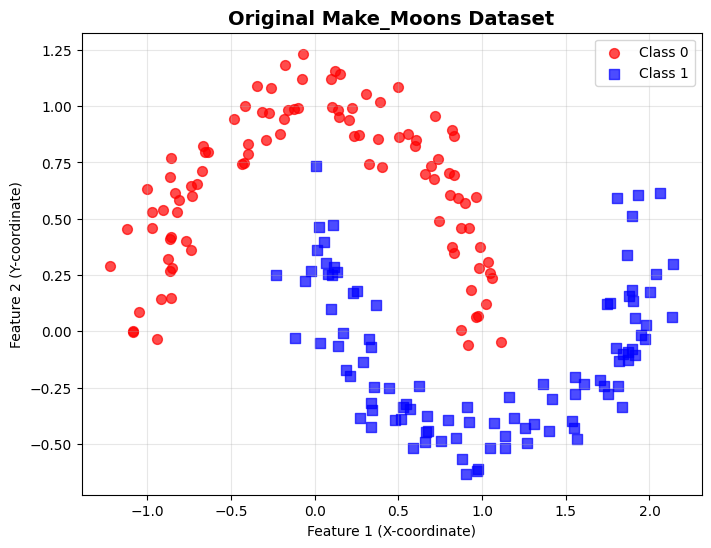

✅ Original dataset generated and visualized!


In [9]:
def generate_original_dataset():
    """Generate the original 2D moon dataset"""
    print("🌙 Generating original dataset...")
    # Create moon-shaped dataset with 200 samples
    X, y = make_moons(n_samples=200, noise=0.1, random_state=42)
    return X, y

# Generate the dataset
X_original, y_original = generate_original_dataset()

print(f"📊 Original dataset shape: {X_original.shape}")
print(f"📊 Number of classes: {len(np.unique(y_original))}")
print(f"📊 Class distribution: Class 0: {sum(y_original==0)}, Class 1: {sum(y_original==1)}")

# Let's visualize the original dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_original[y_original==0, 0], X_original[y_original==0, 1], 
           c='red', marker='o', alpha=0.7, s=50, label='Class 0')
plt.scatter(X_original[y_original==1, 0], X_original[y_original==1, 1], 
           c='blue', marker='s', alpha=0.7, s=50, label='Class 1')
plt.title('Original Make_Moons Dataset', fontsize=14, fontweight='bold')
plt.xlabel('Feature 1 (X-coordinate)')
plt.ylabel('Feature 2 (Y-coordinate)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("✅ Original dataset generated and visualized!")

## Step 3: Data Augmentation Techniques
Now let's define our augmentation functions:

### 3.1 Gaussian Noise Augmentation

🔊 Adding Gaussian noise (level: 0.05)...
📊 Noisy dataset shape: (200, 2)


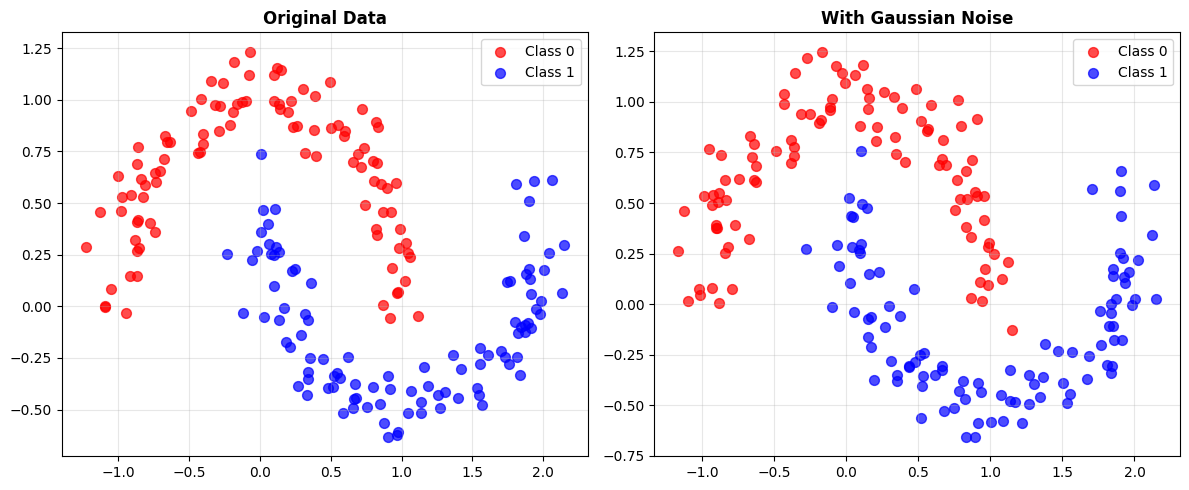

✅ Gaussian noise augmentation demonstrated!


In [10]:
def add_gaussian_noise(X, noise_level=0.1):
    """Add Gaussian noise to the dataset"""
    print(f"🔊 Adding Gaussian noise (level: {noise_level})...")
    # Generate random noise with same shape as data
    noise = np.random.normal(0, noise_level, X.shape)
    X_noisy = X + noise
    return X_noisy

# Test the function
X_noisy = add_gaussian_noise(X_original, noise_level=0.05)
print(f"📊 Noisy dataset shape: {X_noisy.shape}")

# Visualize the effect of Gaussian noise
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Original data
ax1.scatter(X_original[y_original==0, 0], X_original[y_original==0, 1], 
           c='red', alpha=0.7, s=50, label='Class 0')
ax1.scatter(X_original[y_original==1, 0], X_original[y_original==1, 1], 
           c='blue', alpha=0.7, s=50, label='Class 1')
ax1.set_title('Original Data', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Noisy data
ax2.scatter(X_noisy[y_original==0, 0], X_noisy[y_original==0, 1], 
           c='red', alpha=0.7, s=50, label='Class 0')
ax2.scatter(X_noisy[y_original==1, 0], X_noisy[y_original==1, 1], 
           c='blue', alpha=0.7, s=50, label='Class 1')
ax2.set_title('With Gaussian Noise', fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Gaussian noise augmentation demonstrated!")

### 3.2 Horizontal Flipping Augmentation

🔄 Flipping 20.0% of points horizontally...
📊 Flipped dataset shape: (200, 2)


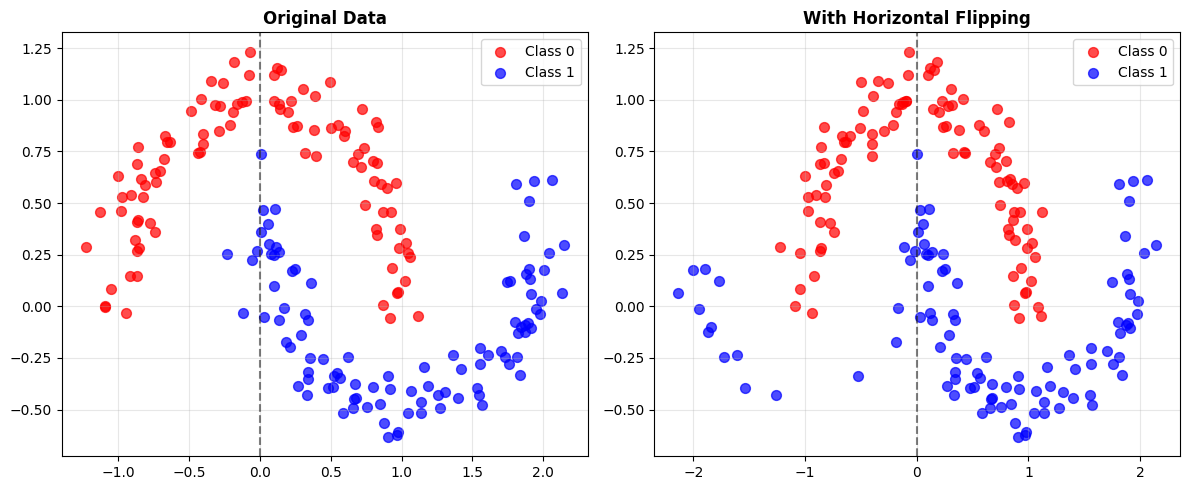

✅ Horizontal flipping augmentation demonstrated!


In [11]:
def flip_horizontally(X, flip_ratio=0.3):
    """Flip some points horizontally (mirror across y-axis)"""
    print(f"🔄 Flipping {flip_ratio*100}% of points horizontally...")
    X_flipped = X.copy()
    n_samples = len(X)
    # Randomly select points to flip
    flip_indices = np.random.choice(n_samples, int(n_samples * flip_ratio), replace=False)
    # Flip x-coordinate (multiply by -1)
    X_flipped[flip_indices, 0] = -X_flipped[flip_indices, 0]
    return X_flipped

# Test the function
X_flipped = flip_horizontally(X_original, flip_ratio=0.2)
print(f"📊 Flipped dataset shape: {X_flipped.shape}")

# Visualize the effect of horizontal flipping
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Original data
ax1.scatter(X_original[y_original==0, 0], X_original[y_original==0, 1], 
           c='red', alpha=0.7, s=50, label='Class 0')
ax1.scatter(X_original[y_original==1, 0], X_original[y_original==1, 1], 
           c='blue', alpha=0.7, s=50, label='Class 1')
ax1.set_title('Original Data', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.axvline(x=0, color='black', linestyle='--', alpha=0.5, label='Y-axis')

# Flipped data
ax2.scatter(X_flipped[y_original==0, 0], X_flipped[y_original==0, 1], 
           c='red', alpha=0.7, s=50, label='Class 0')
ax2.scatter(X_flipped[y_original==1, 0], X_flipped[y_original==1, 1], 
           c='blue', alpha=0.7, s=50, label='Class 1')
ax2.set_title('With Horizontal Flipping', fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.axvline(x=0, color='black', linestyle='--', alpha=0.5, label='Y-axis')

plt.tight_layout()
plt.show()

print("✅ Horizontal flipping augmentation demonstrated!")

## Step 4: Create Combined Augmented Dataset
Now let's combine all augmentation techniques to create a larger, more diverse dataset:

In [12]:
def create_augmented_dataset(X, y):
    """Create augmented dataset with both noise and flipping"""
    print("🚀 Creating augmented dataset...")
    
    # Apply Gaussian noise
    X_noisy = add_gaussian_noise(X, noise_level=0.05)
    
    # Apply horizontal flipping
    X_flipped = flip_horizontally(X, flip_ratio=0.2)
    
    # Combine original + noisy + flipped data
    X_augmented = np.vstack([X, X_noisy, X_flipped])
    y_augmented = np.hstack([y, y, y])  # Repeat labels
    
    return X_augmented, y_augmented

# Create the augmented dataset
X_augmented, y_augmented = create_augmented_dataset(X_original, y_original)

print(f"\n📊 Dataset Comparison:")
print(f"   Original dataset shape: {X_original.shape}")
print(f"   Augmented dataset shape: {X_augmented.shape}")
print(f"   Size increase: {X_augmented.shape[0] / X_original.shape[0]:.1f}x larger!")

print("✅ Augmented dataset created successfully!")

🚀 Creating augmented dataset...
🔊 Adding Gaussian noise (level: 0.05)...
🔄 Flipping 20.0% of points horizontally...

📊 Dataset Comparison:
   Original dataset shape: (200, 2)
   Augmented dataset shape: (600, 2)
   Size increase: 3.0x larger!
✅ Augmented dataset created successfully!


## Side-by-Side Comparison
Let's create the final comparison plot to see the difference:

📊 Creating comparison plots...


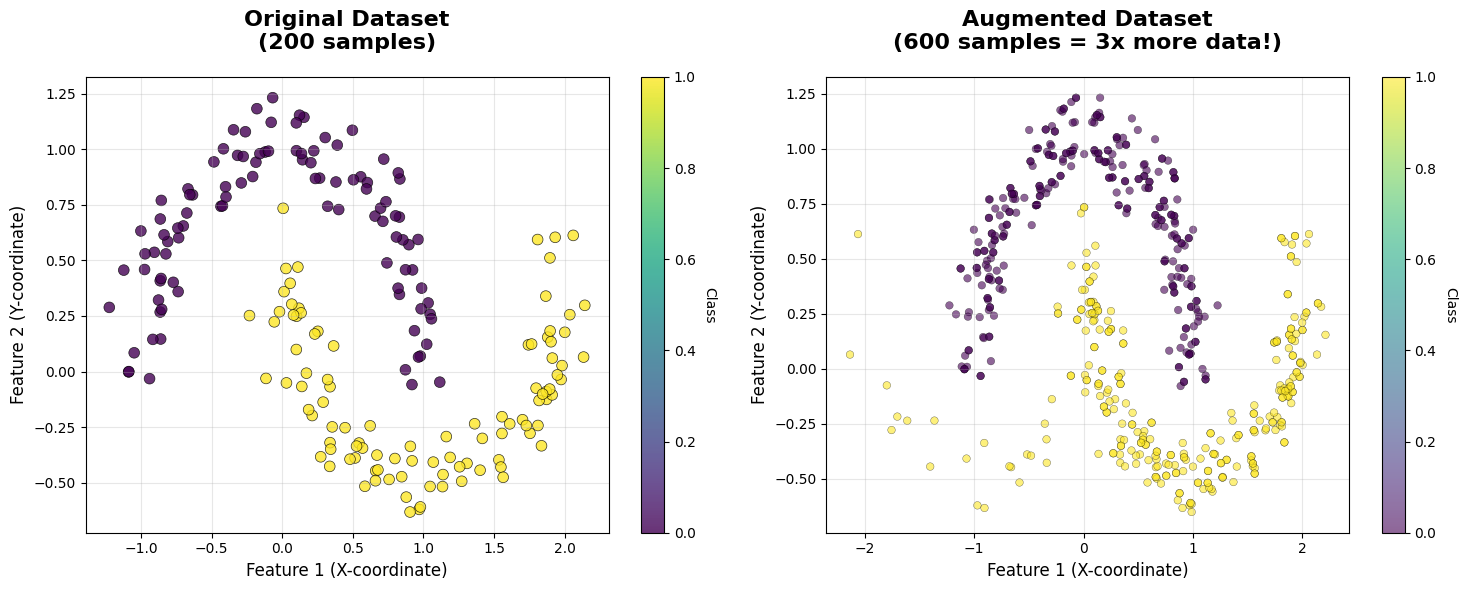

✅ Comparison plot created and saved as 'augmentation_comparison.png'!


In [13]:
def plot_datasets(X_original, y_original, X_augmented, y_augmented):
    """Plot original vs augmented datasets side by side"""
    print("📊 Creating comparison plots...")
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot original dataset
    scatter1 = ax1.scatter(X_original[:, 0], X_original[:, 1], 
                         c=y_original, cmap='viridis', alpha=0.8, s=60, edgecolors='black', linewidth=0.5)
    ax1.set_title('Original Dataset\n(200 samples)', fontsize=16, fontweight='bold', pad=20)
    ax1.set_xlabel('Feature 1 (X-coordinate)', fontsize=12)
    ax1.set_ylabel('Feature 2 (Y-coordinate)', fontsize=12)
    ax1.grid(True, alpha=0.3)
    
    # Add colorbar for original
    cbar1 = plt.colorbar(scatter1, ax=ax1)
    cbar1.set_label('Class', rotation=270, labelpad=15)
    
    # Plot augmented dataset
    scatter2 = ax2.scatter(X_augmented[:, 0], X_augmented[:, 1], 
                          c=y_augmented, cmap='viridis', alpha=0.6, s=30, edgecolors='black', linewidth=0.3)
    ax2.set_title('Augmented Dataset\n(600 samples = 3x more data!)', fontsize=16, fontweight='bold', pad=20)
    ax2.set_xlabel('Feature 1 (X-coordinate)', fontsize=12)
    ax2.set_ylabel('Feature 2 (Y-coordinate)', fontsize=12)
    ax2.grid(True, alpha=0.3)
    
    # Add colorbar for augmented
    cbar2 = plt.colorbar(scatter2, ax=ax2)
    cbar2.set_label('Class', rotation=270, labelpad=15)
    
    plt.tight_layout()
    
    # Save the plot
    plt.savefig('augmentation_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    return fig

# Create the comparison plot
comparison_plot = plot_datasets(X_original, y_original, X_augmented, y_augmented)
print("✅ Comparison plot created and saved as 'augmentation_comparison.png'!")

## Analysis - Why Data Augmentation Reduces Overfitting
Let's understand the benefits of data augmentation:

In [15]:
def explain_augmentation_benefits():
    """Simple explanation of why augmentation reduces overfitting"""
    
    print(" WHY DATA AUGMENTATION REDUCES OVERFITTING:")
    print("=" * 55)
    
    print("\n1️ MORE TRAINING DATA:")
    print("   • Original: 200 samples")
    print("   • Augmented: 600 samples (3x more data!)")
    print("   • More data helps model learn better patterns")
    
    print("\n2️ INCREASED VARIETY:")
    print("   • Gaussian noise: Adds small random variations")
    print("   • Horizontal flipping: Shows data from different angles")
    print("   • Model sees more diverse examples of the same patterns")
    
    print("\n3️ BETTER GENERALIZATION:")
    print("   • Model learns to handle noisy/imperfect data")
    print("   • Becomes less sensitive to small changes")
    print("   • Performs better on new, unseen data")
    
    print("\n4️ REGULARIZATION EFFECT:")
    print("   • Forces model to focus on important features")
    print("   • Reduces memorization of training data")
    print("   • Prevents overfitting to specific data points")
    
    print("\n SIMPLE ANALOGY:")
    print("   Learning to recognize cats by seeing only 10 perfect cat photos vs")
    print("   seeing 30 photos with different lighting, angles, and backgrounds.")
    print("   Which helps you recognize cats better in real life?")
    
    print("\n" + "=" * 55)

# Display the explanation
explain_augmentation_benefits()

 WHY DATA AUGMENTATION REDUCES OVERFITTING:

1️ MORE TRAINING DATA:
   • Original: 200 samples
   • Augmented: 600 samples (3x more data!)
   • More data helps model learn better patterns

2️ INCREASED VARIETY:
   • Gaussian noise: Adds small random variations
   • Horizontal flipping: Shows data from different angles
   • Model sees more diverse examples of the same patterns

3️ BETTER GENERALIZATION:
   • Model learns to handle noisy/imperfect data
   • Becomes less sensitive to small changes
   • Performs better on new, unseen data

4️ REGULARIZATION EFFECT:
   • Forces model to focus on important features
   • Reduces memorization of training data
   • Prevents overfitting to specific data points

 SIMPLE ANALOGY:
   Learning to recognize cats by seeing only 10 perfect cat photos vs
   seeing 30 photos with different lighting, angles, and backgrounds.
   Which helps you recognize cats better in real life?

